
# Hands-on 2 Tutorial: Clasificación con k-Nearest Neighbors (kNN)

**Autor:** Angel Parada  
**Fecha:** 8 de noviembre del 2025  
    


## 1. Fundamentos de la técnica

El algoritmo **k-Nearest Neighbors (kNN)** es un método de aprendizaje supervisado utilizado tanto para clasificación como para regresión.  
Su principio básico consiste en asignar la clase de un nuevo punto según las clases de sus "k" vecinos más cercanos en el conjunto de entrenamiento.

Características clave:
- Es no paramétrico (no asume ninguna distribución de los datos).
- Utiliza una métrica de distancia (como la euclidiana) para medir la similitud.
- Su rendimiento depende de la elección de k y de la escala de las características.
    


## 1.2 Modelo Matemático

Dado un conjunto de entrenamiento:

$$ D = \{ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) \} $$

donde **$ x_i \in \mathbb{R}^m $** representa un vector de características y **$ y_i $** la clase correspondiente.

Para clasificar un nuevo punto **$ x $**:
1. Se calcula la distancia euclidiana a todos los puntos de entrenamiento:

$$ d(x, x_i) = \sqrt{\sum_{j=1}^{m} (x_j - x_{ij})^2} $$

2. Se seleccionan los k puntos más cercanos.
3. Se asigna la clase que ocurra con mayor frecuencia entre esos vecinos:

$$ \hat{y} = \text{mode}(y_{(1)}, y_{(2)}, ..., y_{(k)}) $$    


##  1.3 Descripción de la librería y clases principales

Use **scikit-learn**, una biblioteca de Python especializada en aprendizaje automático.

Clases y funciones relevantes:
- `sklearn.neighbors.KNeighborsClassifier`: Implementa el modelo kNN para clasificación.  
- `fit(X, y)`: Entrena el modelo con los datos.  
- `predict(X)`: Predice la clase de nuevas instancias.  
- `score(X, y)`: Calcula la exactitud (accuracy).  
- `sklearn.metrics.confusion_matrix`: Crea la matriz de confusión.  
- `sklearn.metrics.accuracy_score`: Calcula el porcentaje de aciertos.
    

## 1.4 Pipeline del modelo

### 1.4.1 Preprocesamiento

In [21]:
# Preprocesamiento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Cargar dataset (Iris)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Crear un DataFrame de Pandas para la visualización inicial
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = [iris.target_names[i] for i in y]

# Mostrar las primeras filas
df.head()
    

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
# Estadísticas básicas
print("Estadísticas descriptivas")
display(df.describe())

# Distribución de clases
print("\nDistribución de Clases")
print(df['target_name'].value_counts())
    

Estadísticas descriptivas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Distribución de Clases
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


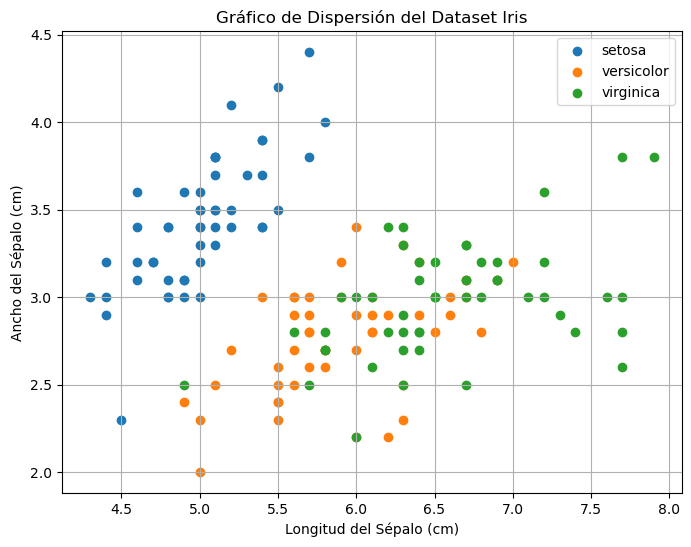

In [22]:
# Gráfico de dispersión (Sepal Length vs. Sepal Width)
plt.figure(figsize=(8,6))
for i, species in enumerate(iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=species)
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.title('Gráfico de Dispersión del Dataset Iris')
plt.legend()
plt.grid(True)
plt.show()
    

### 1.4.2 Feature Engineering

In [13]:
#Feature Engineering

X_features = df[feature_names].values
y_target = df['target'].values

# Dividir dataset: entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.3, random_state=42, stratify=y_target
)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    

### 1.4.3 Prediction

El patrón [5.0, 3.4, 1.6, 0.4] pertenece a la clase: 'setosa'


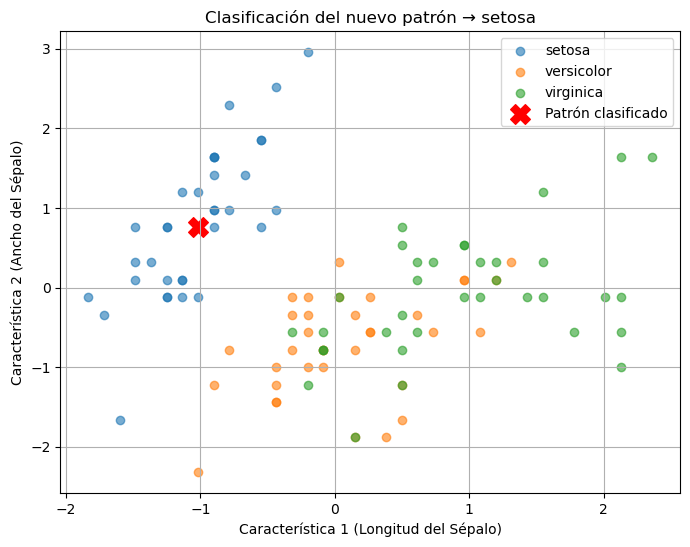

In [23]:
#Prediction
# Entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Función para clasificar y mostrar el resultado gráficamente
def clasificar_patron(patron):
    patron_escalado = scaler.transform([patron])
    prediccion = knn.predict(patron_escalado)
    clase = iris.target_names[prediccion[0]]

    # Imprimir el resultado
    print(f"El patrón {patron} pertenece a la clase: '{clase}'")

    #Gráfico de dispersión (usando las dos primeras características)
    plt.figure(figsize=(8,6))
    for i, especie in enumerate(iris.target_names):
        plt.scatter(
            X_train_scaled[y_train==i, 0],
            X_train_scaled[y_train==i, 1],
            label=especie,
            alpha=0.6
        )

    # Agregar el nuevo patrón clasificado
    plt.scatter(
        patron_escalado[0, 0], patron_escalado[0, 1],
        color='red', marker='X', s=200, label='Patrón clasificado'
    )

    plt.xlabel('Característica 1 (Longitud del Sépalo)')
    plt.ylabel('Característica 2 (Ancho del Sépalo)')
    plt.title(f'Clasificación del nuevo patrón → {clase}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo
clasificar_patron([5.0, 3.4, 1.6, 0.4])
    

### 1.4.4 Model Evaluation

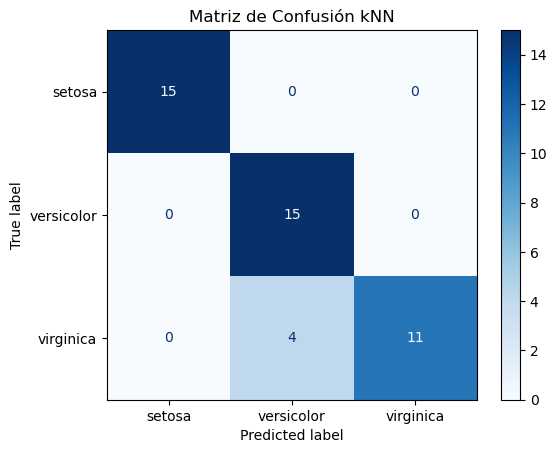

Accuracy del modelo: 91.11%


In [24]:
#Model Evaluation
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión kNN")
plt.show()

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc*100:.2f}%")
    

## Referencias Bibliográficas

- Implementation of KNN classifier using Scikit - learn - Python. (2019, mayo 23). GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/ml-implementation-of-knn-classifier-using-sklearn/

- K-nearest neighbor(KNN) algorithm. (2017, abril 14). GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/

- KNeighborsClassifier. (s/f). Scikit-Learn. Recuperado el 5 de noviembre de 2025, de https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- ¿Qué es el algoritmo KNN? (2025, octubre 7). Ibm.com. https://www.ibm.com/mx-es/think/topics/knn
    